In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from matplotlib.patches import Arc

In [6]:
df = pd.read_csv("dataset/schüler_pslvis_ERFOLG_train.csv")
df

,Erfolg,Mathe Natur Studium,Alter Studienbeginn,Männlich,Migrant,Note Abschlusszeugnis,Gymnasium besucht,Mathe Leistungskurs,Berufsbegleitendes Studium,Fernstudium,Zufriedenheit Leben,Gewissenhaftigkeit,Verträglichkeit,Extraversion,Offenheit Intellekt,Neurotizismus
0,0,False,19,True,False,2.4,True,True,False,False,7,3.50,3.25,3.00,4.0,2.50
1,1,True,19,False,False,1.7,True,True,False,False,8,4.75,3.50,3.50,3.2,2.25
2,0,False,19,False,False,1.4,True,True,False,False,8,4.25,4.75,5.00,3.2,2.50
3,1,False,18,False,True,2.7,True,True,False,False,9,4.25,3.25,4.50,4.2,3.25
4,1,True,20,True,False,2.0,True,True,False,False,9,3.75,3.75,2.25,3.6,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,0,False,19,False,True,2.6,False,False,False,False,7,3.00,3.00,2.25,2.4,3.75
1439,1,True,21,True,False,1.3,False,False,False,False,8,3.00,2.25,4.25,4.6,1.75
1440,1,False,18,True,False,2.9,True,True,False,False,8,3.25,4.00,4.25,2.6,2.75
1441,1,False,18,False,False,2.2,True,False,False,False,8,2.75,2.25,2.75,4.4,2.50


In [7]:
def add_patch(ax, cell_x, cell_y):
    # Get the edges of the cell
    x_left = cell_x
    x_right = cell_x + 1
    y_bottom = cell_y
    y_top = cell_y - 1

    # Define the coordinates for the pattern
    vertices = [
        (x_left, (y_top + y_bottom) / 2),  # Start from middle left
        (x_left+(x_right-x_left)*.3 , (y_top + y_bottom) / 2),  # Go to the center
        ((x_right+x_left)/2 , y_bottom-(y_bottom-y_top) *.3),  # Go to the center
        ((x_left + x_right) / 2, y_bottom),  # Go down to the middle of the bottom
    ]
    codes = [Path.MOVETO, Path.LINETO, Path.LINETO,Path.LINETO]

    # Create the Path and add the patch
    path = Path(vertices, codes)
    patch = PathPatch(path, edgecolor='black', lw=1, zorder=10,fill=False)
    ax.add_patch(patch)

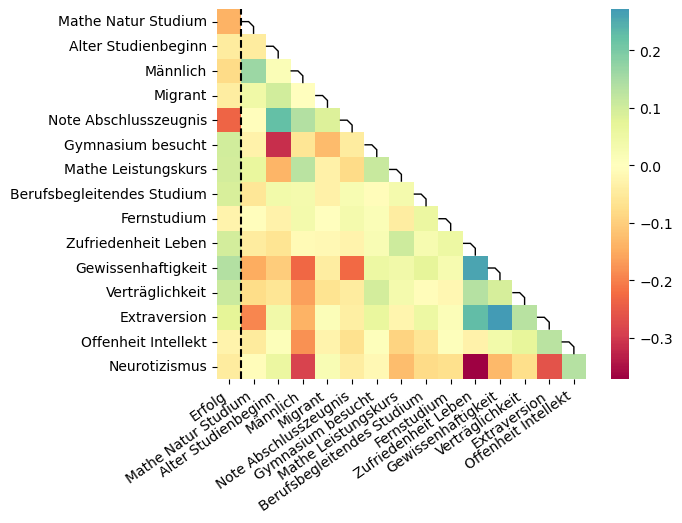

In [ ]:
corr = df.iloc[:,:].corr().iloc[1:,:-1]
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
ax = sns.heatmap(corr,mask=mask, cmap="Spectral", center=0, square=True)
for i in range(14):
    add_patch(ax, 1+i, 1+i)  #
    #arc = Arc((1+i,1+i), width=1, height=1, angle=0, theta1=270, theta2=360, color="black", lw=1.5)
    #ax.add_patch(arc)
ax.axvline(1, color="black", linestyle="--", lw=1.5)
plt.xticks(rotation=35, ha="right")
plt.savefig("dataset/dataset_schüler.pdf", bbox_inches="tight")

In [17]:
from matplotlib.colors import LinearSegmentedColormap
trr = LinearSegmentedColormap.from_list("trr", ["#213564", "#d2d0cb", "#dadc3e"])